In [1]:
push!(LOAD_PATH, pwd()*"/..")
using Roots,Optim
using SIS,IM,PayloadGraph,PyPlot, Epidemics,JLD, TwoLevelGraphs,Dierckx,Plotting,DataAnalysis,GraphGeneration
import LightGraphs

We have selection and fluctuation functions $a(y)$ and $b(y)$, respectively. In a well mixed populations, these take the form

\begin{align}
a(y) &= y (1 - y) s(y) \\
b(y) &= y (1 - y) \frac{2 + O(s(y))}{N} \\
\end{align}

assuming that $s(y) \ll 1$, we have $\frac{2 a(y)}{b(y)} \approx N s(y)$, and we obtain for the characteristic selection function $\psi(z) = exp \left( - \int_0^{z} \frac{2 a(y)}{b(y)} dz \right)$:

\begin{equation}\label{eq:psi}
\psi(z) = e^{- N S(z)}
\end{equation}

where $S(z) = \int_0^z s(y) dy$.


Recalling now the relevant equations for $P_{reach}(y,y_0)$:

\begin{equation}\label{eq:p_reach_def}
P_{reach}(y,y_0) = \frac{\int_0^{y_0} \psi(z) dz}{\int_0^{y} \psi(z) dz}
\end{equation}

For our purposes, we will have $y_0 \sim \frac{1}{N}$. Over this "smallest" intervall in $y$, we do not expect much variation in $s(y)$. Thus we have $s(\frac{1}{N}) \sim s(0)$ and thus $S(\frac{1}{N}) \approx \frac{1}{N} s(0)$. Thus $- N S(z) \approx - s(0)$. Since $|s(z)| \ll 1$, we have $\psi(z) \approx e^0 = 1$. This gives for the numerator of equation \ref{eq:p_reach_def}

$$\int_0^{y_0} \psi(z) dz \approx \frac{1}{N} \; . $$

Now if we had purely neutral selection, then $s(z) = 0$. In that case the answer for the numerator is exact and the denominator becomes

$$\int_0^{y} \psi(z) dz = y\; . $$

which gives

$$P_{reach}(y,y_0) = \frac{y_0}{y}$$

and in particular, denoting $P_{reach}(y) \equiv P_{reach}(y,\frac{1}{N})$,

$$P_{reach}(y) = \frac{1}{N y}$$

Thus for neutral selection we expect the above scaling which implies

$$\int_0^{y} \psi(z) dz = y\; . $$

or, taking the derivative with respect to $y$ of both sides,

$$\psi(y) \sim 1$$

which implies a small argument of the exponential of $\psi(z)$. It is thus reasonable to set a "neutral selection threshold" when that argument becomes significant, i.e. $O(1)$. This gives us an equation for the neutral selection threshold:

\begin{equation}\label{eq:neutral_selection_threshold}
| N S(y) | = 1
\end{equation}

Of course, the threshold can be made more or less stringent by adjusting the RHS from 1. The LHS is the correct figure of merit for neutral selection.

Now, consider more generally the behavior of $P_{reach}(y)$ for increasing $y$. The numerator is constant. The denominator is the integral of $ e^{- N S(y)}$. Since the integrand is exponential in $- N S(y) \equiv Sigma(y)$, it will be at all times dominated by the current maximum of $\Sigma(y)$. Let that maximum be $M$. We can thus distinguish $3$ cases.

\begin{itemize}

\item If $\Sigma(y) - M \ll -1$, then the integral is not contributing to the denominator significantly. $P_{reach}$ will be flat, which corresponds to positive selection.


\item If $\Sigma(y) - M \gg 1$ (implying that $\Sigma(y)$ is rising), then the current value of $\Sigma(y)$ is dominating the integral. $P_{reach} \sim e^-{\Sigma(y)}$ in this regime. $P_{reach}$ is dropping exponentially which corresponds to negative selection 

\item $| \Sigma(y) - M | < 1$. In this regime, the current value of the integrand is having a constant contribution to the overall integral. This means the denominator is growing $\sim y$, so the scaling is $P_{reach} \sim \frac{1}{y}$, which corresponds to neutral selection.

\end{itemize}

If after dropping $\Sigma(y)$ reaches a new minimum and changes its behavior, that value is assigned to $M$.

has a derivative with respect to $y$:

$$\frac{\partial}{\partial y} \int_0^y \psi(z) dz = e^{- N S(y) }$$

Now, since the argument in the integral is exponential, the total value of the integral will be dominated by the largest value of $ - N S(y)$. Assume now we want to find the scaling of $P_{reach}(y)$ with respect to $y$. Let $y^*$ denote the minimum value of $N S(y)$ so far. We can thus classify the behavior of $P_{reach}$. For 


This allows us to categorize selection behavior:

\begin{itemize}
\item $- N S(y) \ll -1$. In this case $\psi(z) \to 0$ and $P_{reach}(y) \sim const$. This corresponds to positive selection, where once the process has reached a certain $y$, it will almost surely reach higher $y$ as well.

\item $- N S(y) \gg 1$. In this case $\psi(z) \sim e^{N S(y)}$ and $P_{reach}(y)$ will drop exponentially in $y$. In particular $P_{reach}(y) = \frac{1}{N} \left( \int_0^{z}e^{|N S(z)|} dz\right)^{-1}$. This corresponds to strong negative selection where reaching higher $y$ is becomes exponentially unlikely.

\item $|N S(y)| \ll 1$. This is the above described case where we have neutral selection and $P_{reach} \sim \frac{1}{Ny}$.
\end{itemize}

While the selection threshold $| N S(y) | = 1$ holds generally, it reduces to the well known result for constant s. Assume $s(y) = s_0$. Then $S(y) = s_0 y$ and we get
$$ N s_0 y = 1$$



Numerical Trials
----------------

In [185]:
close("all")
k = 20
y_n = 0.2#0.2
c_r = 0.2#0.4
N = 2000#100000#400
n_n = y_n*N#10#80#y_n*N
beta = 4.0/(c_r*n_n)
alpha = (N*beta)/n_n
# alpha = 0.0
println("N=$N, alpha = $alpha, beta = $beta")

#Generate a random startin vector
m = 20#20 number of nodes in a community
n = Int(N/m) 
l = 19#Int(m/2)#10#internal
r = 1#2#Int(m/2)#2 #external

im_wm = InfectionModel(x -> 1 + alpha*x , x -> 1 + beta);
im_reg = InfectionModel(x -> 1 + beta + get_s_eff_exact(x,alpha,beta,k,N) , x -> 1 + beta);

t = TwoLevel(N,m,l,r)
#distribute_randomly(t,n)
yvals,pvals,s_tl = get_p_reach_theory(t,alpha,beta,N)







N=2000, alpha = 0.25, beta = 0.05


([0.0005,0.000503819,0.000507667,0.000511544,0.000515451,0.000519388,0.000523355,0.000527352,0.000531379,0.000535438  …  0.933815,0.940947,0.948134,0.955375,0.962672,0.970024,0.977433,0.984898,0.99242,1.0],[1.0,0.992285,0.984628,0.97703,0.96949,0.962007,0.954582,0.947213,0.9399,0.932643  …  0.0238642,0.0238642,0.0238642,0.0238642,0.0238642,0.0238642,0.0238642,0.0238642,0.0238642,0.0238642],TwoLevelGraphs.s_actual)

In [182]:
s_wm = get_s_interp(im_wm,N)
s_reg = get_s_interp(im_reg,N)
s_reg1 = get_s_interp(im_reg1,N)
s_reg2 = get_s_interp(im_reg2,N)
s_reg3 = get_s_interp(im_reg3,N)

S_wm = get_s_integral_interp(s_wm)
S_reg = get_s_integral_interp(s_reg)
S_tl = get_s_integral_interp(s_tl)

pp_tl = pvals
yy = logspace(log10(1/N),log10(1),1000)
pp_wm = P_reach_fast(im_wm,N,1.0/N,yy,true)
pp_reg = P_reach_fast(im_reg,N,1.0/N,yy,true);


In [29]:
function get_vectorized(s::Function)
    s_vec = function (x)
        if typeof(x) <: Real
            return s(x)
        elseif typeof(x) <: Array
            yy = 1.0*x
            for i in 1:length(x)
                yy[i] = s(x[i])
            end
            return yy
        else
            println("Wrong Argument")
        end
    end
    return s_vec
end

function s_fant_linear(x::Real)
    s_0 = -0.0007
    intercept = 0.5 # -s_0/s_1
#     s_1 = -s_0/intercept
    s_1 = 0.003501
    
    return x*s_1 + s_0
end
    


function s_fant_thresh(x::Real)
    thresh = 0.01
    x_0 = -0.1
    x_1 = 0.0
    if x < thresh
        return x_0
    else
        return x_1
    end
end

function s_fant_fit(x::Real)
    if x > 1e-2 || x < 1e-6
        return 0
    end
    x = (6.9+log10(x+1e-10))
    return 1.0*(0.01*(3.8 - x) + 0.4./x.^5)
#     return 0.01*(3.8 - (6.9+log10(x+1e-10)))
end

function s_fant_double_thresh(x::Real)
    thresh0 = 0.2
    thresh1 = 0.4
    x_0 = 0.001
    x_1 = 0.001
    x_2 = 0.001
    if x < thresh0
        return x_0
    elseif x < thresh1
        return x_1
    else
        return x_2
    end
end

function s_fant_triple_thresh(x::Real)
    thresh0 = 1e-3
    thresh1 = 0.2
    thresh2 = 0.3
    x_0 = -0.01
    x_1 = 0.01
    x_2 = -0.007
    x_3 = 0
    if x < thresh0
        return x_0
    elseif x < thresh1
        return x_1
    elseif x < thresh2
        return x_2
    else
        return x_3
    end
end



s_fant_triple_thresh (generic function with 1 method)

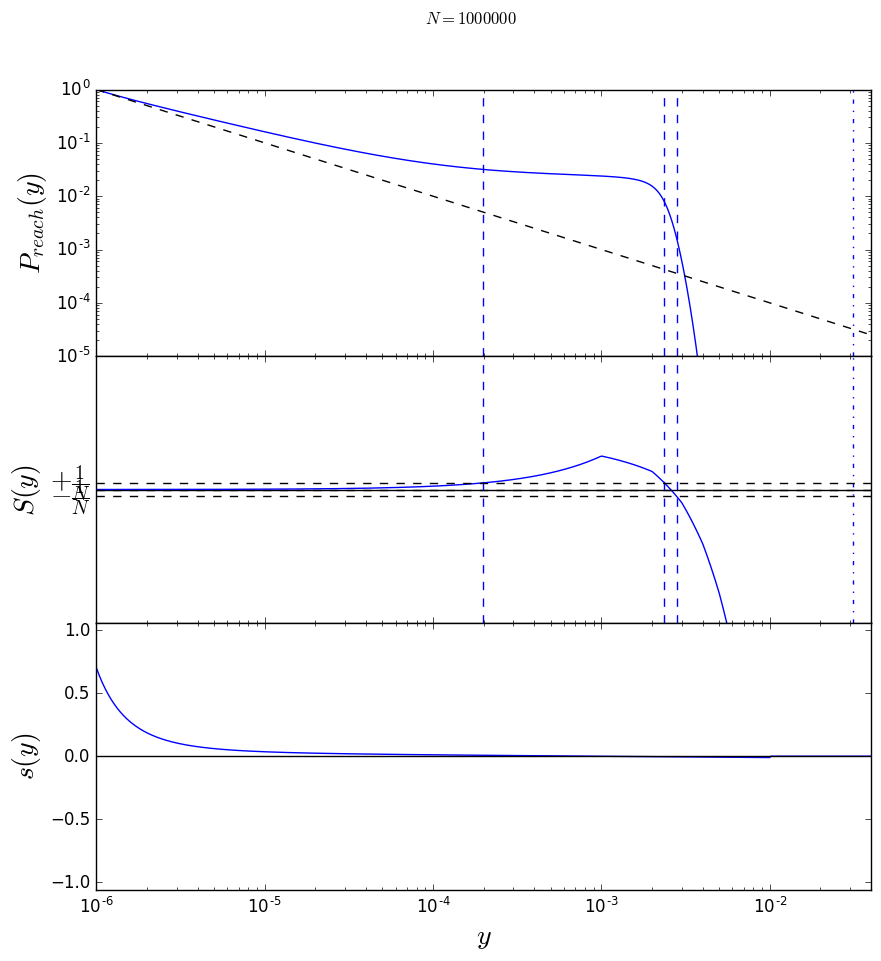

Any[0.0]


(1.0e-6,0.04)

In [33]:
N = 1000_000
s_fant = get_vectorized(s_fant_fit)

im_fant = InfectionModel(x -> 1 + s_fant(x) , x -> 1);
yy = logspace(log10(1/N),log10(1),1000)
pp_fant = P_reach_fast(im_fant,N,1.0/N,yy,true,num_points=1000)

selection_schematic(s_fant,yy,pp_fant,N,"b",true)
xlim([1/N,4e-2])
# selection_schematic(s_reg,yy,pp_reg,N,"k",true,label=latexstring("k = $k"))
# selection_schematic(s_tl,yvals,pvals,N,"b",true,label=latexstring("k_i = $l,k_e = $r"))
# selection_schematic(s_reg1,yy,pp_reg1,N,"g",label=L"k = 20")
# selection_schematic(s_reg2,yy,pp_reg2,N,"r",label=L"k = 100")
# selection_schematic(s_reg3,yy,pp_reg3,N,"k",label=L"k = 399")
# selection_schematic(s_wm,yy,pp_wm,N,"k",true,label=latexstring("k = N-1"))



In [32]:
#This is where the selection changes. This is everytime after a minima after the N S(y) value grows by at least 1.
function find_change_points(f::Function,x0,x1,num_intervals=127)
    delta = 1.0
    minimizers = find_local_minima(f,x0,x1,num_intervals)
#     println("here: $(minimizers)")
    change_points = []
    impt_minimizers = []
    depth = Inf
    while length(minimizers) > 0
        curr_minimizer = minimizers[1]
        impt_minimizers = vcat(impt_minimizers,[curr_minimizer])
        depth = f(curr_minimizer)
        pot_change_points = find_change_point(f,curr_minimizer,x1,delta)
        first_idx = findfirst(x -> f(x) < depth-delta,minimizers)
        if first_idx ==0
            change_points = vcat(change_points,pot_change_points)
            break
        else
            next_minimizer = minimizers[first_idx]
            viable_change_points = pot_change_points[pot_change_points .< next_minimizer]
            minimizers=minimizers[first_idx:end] 
            change_points = vcat(change_points,viable_change_points)
        end
    end

    return change_points,impt_minimizers
end

function find_change_point(f,x0,x1,delta=1.0)
    roots = fzeros( x -> abs(f(x0+10^x) - f(x0)) - delta,-6,log10(x1-x0),no_pts=1000)
    return x0+10.^roots
end


function keep_running_deepest_minima(f,minimizers)
    current_deepest = Inf
    final_minimizers = []
    for mcurr in minimizers
        if f(mcurr) < current_deepest
            push!(final_minimizers,mcurr)
            current_deepest = f(mcurr)
        end
    end
    return final_minimizers
end
        
        

function find_local_minima(f,x0,x1,num_intervals=127)
    minimizers = Set([1.0*x0])
    boundaries = linspace(x0,x1,num_intervals)
    for i = 1:length(boundaries)-1
        result = optimize(f,boundaries[i],boundaries[i+1])
        curr_minimizer = result.minimizer
        if ~float_eq(curr_minimizer,boundaries[i]) && ~float_eq(curr_minimizer,boundaries[i+1])
            push!(minimizers,curr_minimizer)
        end
    end
    return sort(collect(minimizers))
end

function float_eq(f1,f2,eps=1e-5)
    return abs(f1-f2) < eps
end
        


#########PLOTTING

function selection_schematic(s_fn,yy,pp,N,color="k",logx=false;label="")

    pygui(false)
    fig = figure("pyplot_subplot_touching",figsize=(10,10))
    subplots_adjust(hspace=0.0) # Set the vertical spacing between axes
    suptitle(latexstring("N = $N"))

    subplot(311) # Create the 1st axis of a 3x1 array of axes
    ax1 = gca()
    if logx
        ax1[:loglog](yy,pp,label=label,color=color)
    else
        ax1[:semilogy](yy,pp,label=label,color=color)
    end
    plot_selection_thresholds_minima(s_fn,N,color)
    ylabel(L"P_{reach}(y)",size=20)
    setp(ax1[:get_xticklabels](),visible=false) # Disable x tick labels
    legend(loc="best")
    plot(yy,1./(N*yy),"--k")
    ylim([1e-5,1e0])


    subplot(312,sharex=ax1) # Create the 2nd axis of a 3x1 array of axes
    axhline(0,color="k")
    ax2 = gca()
    selection_threshold_plot_minima(s_fn,N,false,color)
    xlabel(L"$y$",size=20)
    ylabel(L"$S(y)$",size=20)
    setp(ax2[:get_xticklabels](),visible=false) # Disable x tick labels
    ylim([-20/N,20/N])
#     ss = N*yy.*s_fn(yy)
#     plot(yy,ss)
    axhline(-1/N,linestyle="--",color="k")
    axhline(1/N,linestyle="--",color="k")
    ax2[:set_yticks]([-1/N,1/N])
    ax2[:set_yticklabels]([L"-\frac{1}{N}",L"+\frac{1}{N}"])
    setp(ax2[:get_yticklabels](),size=20) # Disable x tick labels
    # annotate(L"N S(y) = \pm 1",xy=[1,0],xytext=[1.1,0],size=20,xycoords="data",arrowprops=Dict("facecolor"=>"black","shrink"=>0.01))
    #legend(loc="best")

    subplot(313,sharex=ax2) # Create the 3rd axis of a 3x1 array of axes
    ax3 = gca()
    ss = s_fn(yy)
    plot(yy,ss,color=color)
    axhline(0,color="k")
    extent = maximum(abs(ss))
    fac = 1.5
    ylim([-fac*extent,fac*extent])
    xlabel(L"$y$",size=20)
    ylabel(L"$s(y)$",size=20)
end







using Roots

function selection_threshold_plot(s::Function,N::Int,log_plot=true,color="b")
    S = get_s_integral_interp(s)
    roots = get_selection_thresholds(S,N)
    xx = logspace(log10(1/N),log10(1),1000)
    if log_plot
        semilogx(xx,N*S(xx))
    else
        plot(xx,N*S(xx))
    end
#     axhline(1,color="k",linestyle=":",label=L"$N S(y) = 1$")
#     axhline(-1,color="k",linestyle=":",label=L"$N S(y) = -1$")
    plot_axvlines(roots,color,"--")
end

function selection_threshold_plot_minima(s::Function,N::Int,log_plot=true,color="k")
    S = get_s_integral_interp(s)
    roots,minima = find_change_points(x -> N*S(x),0,1)
    xx = logspace(log10(1/N),log10(1),1000)
    if log_plot
        semilogx(xx,S(xx),color=color)
    else
        plot(xx,S(xx),color=color)
    end
#     axhline(1,color="k",linestyle=":",label=L"$N S(y) = 1$")
#     axhline(-1,color="k",linestyle=":",label=L"$N S(y) = -1$")
    
    if length(minima) > 1
        println(minima[1:end-1])
        plot_axhlines(S(minima[1:end-1]),"k","--",xmins=minima[1:end-1])
    end
    plot_axvlines(roots,color,"--")
    plot_axvlines(minima,color,"-.")
end

function plot_selection_thresholds_minima(s::Function,N::Int,color="k")
    S = get_s_integral_interp(s)
    roots,minima = find_change_points(x -> N*S(x),0,1)
    plot_axvlines(roots,color,"--")
    plot_axvlines(minima,color,"-.")
end
 

function get_selection_thresholds(S::Function,N::Int)
    roots = fzeros( x -> abs(S(10^(x))) - 1/N,-6,0,no_pts=1000)
    roots = 10.^roots
    return roots
end

function plot_selection_thresholds(s::Function,N::Int,color="k")
    roots = get_selection_thresholds_from_s(s,N)
    plot_axvlines(roots,color)
end
    

function get_selection_thresholds_from_s(s::Function,N)
    S = get_s_integral_interp(s)
    return get_selection_thresholds(S,N)
end
    
function plot_axvlines(points::Array,color="k",linestyle="--")
    for p in points
        axvline(p,color=color,linestyle=linestyle)
    end
end

function plot_axhlines(points::Array,color="k",linestyle="--";xmins=nothing)
    if xmins == nothing 
        xmins = zeros(length(points))
    end
    for i in 1:length(points)
        axhline(points[i],xmins[i],color=color,linestyle=linestyle)
    end
end


plot_axhlines (generic function with 3 methods)

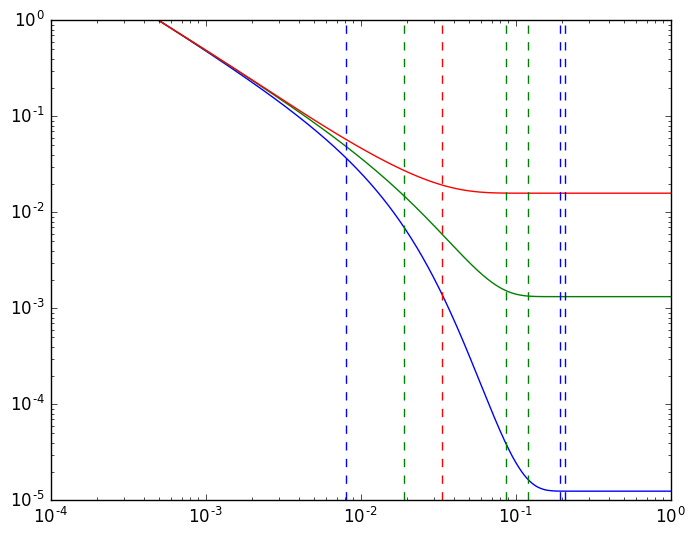

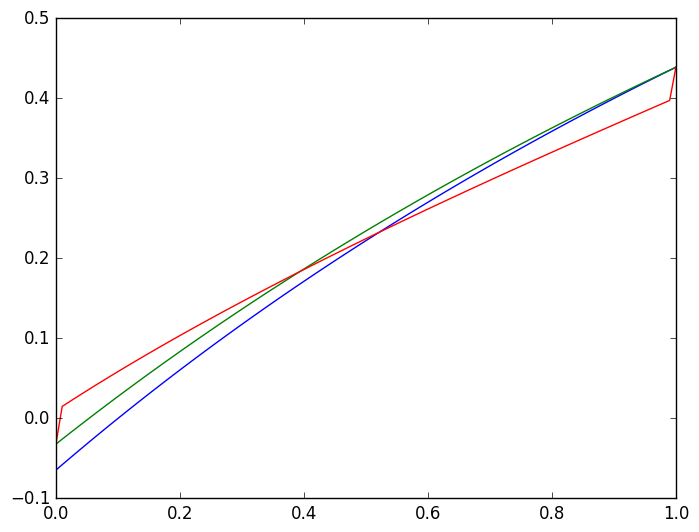

In [41]:
close("all")
pygui(false)


figure(2)
xx = collect(linspace(0,1,100))
plot(xx,s_wm(xx))
plot(xx,s_reg(xx))
plot(xx,s_tl(xx))

figure(1)
loglog(yy,pp_wm)
loglog(yy,pp_reg)
loglog(yvals,pvals)
plot_selection_thresholds(s_wm,N,"b")
plot_selection_thresholds(s_reg,N,"g")
plot_selection_thresholds(s_tl,N,"r")
